In [17]:
import numpy as np

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pydae.grid_tools as gt
#import pydae.ssa as ssa
from IPython.core.display import HTML,SVG
#from pydae.svg_tools import svg
#import scipy.optimize as sopt
#%config InlineBackend.figure_formats = ['svg']

In [19]:
%matplotlib widget

In [20]:
import bus2_line

In [21]:
X_c_sh = 400e3*2/278e6
Z_b = 400e3*2/100e6
X_c_sh_pu = X_c_sh/Z_b

In [69]:
grid = bus2_line.bus2_line_class()

grid.ini({'V_min_1':-5,'P_2':-330.0e6,'S_n_1':10e9,
          'b_shunt_1':-0.0/X_c_sh_pu,'g_shunt_1':0,
          'b_shunt_2':-0.0/X_c_sh_pu,'g_shunt_2':0},'xy_0.json')
grid.report_y()
grid.report_x()

p_mw   = grid.get_value('p_g_1')*grid.get_value('S_n_1')/1e6
q_mvar = grid.get_value('q_g_1')*grid.get_value('S_n_1')/1e6

print(f'P = {p_mw:5.2f} MW, Q = {q_mvar:5.2f} Mvar')

V_1   =  1.00
theta_1 = -0.06
V_2   =  1.00
theta_2 = -0.46
i_d_1 = -0.01
i_q_1 =  0.04
p_g_1 =  0.04
q_g_1 = -0.01
v_f_1 =  0.98
p_m_ref_1 =  0.04
p_m_1 =  0.04
omega_coi =  1.00
p_agc = 2533.89
delta_1 = -0.00
omega_1 =  1.00
e1q_1 =  1.00
e1d_1 =  0.04
v_c_1 =  1.00
xi_v_1 = 980543.23
x_gov_1_1 =  0.04
x_gov_2_1 =  0.04
xi_imw_1 = -2533.86
xi_freq = 25338.93
P = 353.39 MW, Q = -121.54 Mvar


In [70]:
# S = U**2/R
R_c = 400e3**2/404e6
#-404.0e6 Q_1 = 0
#-330.0e6 V_1 = V_2
R_c

396.03960396039605

In [32]:
grid.save_xy_0('xy_0.json')


In [11]:
grid.report_params()

S_base =100000000.00
g_1_2 = 1.52
b_1_2 =-8.89
bs_1_2 = 2.57
g_shunt_1 = 0.00
b_shunt_1 =-0.00
g_shunt_2 = 0.00
b_shunt_2 =-0.00
U_1_n =400000.00
U_2_n =400000.00
S_n_1 =1200000000.00
Omega_b_1 =314.16
H_1   = 5.00
T1d0_1 = 8.00
T1q0_1 = 0.40
X_d_1 = 1.80
X_q_1 = 1.70
X1d_1 = 0.30
X1q_1 = 0.55
D_1   = 1.00
R_a_1 = 0.01
K_delta_1 = 0.01
K_sec_1 = 1.00
K_a_1 =100.00
K_ai_1 = 0.00
T_r_1 = 0.02
V_min_1 =-5.00
V_max_1 = 5.00
K_aw_1 = 0.10
Droop_1 = 0.05
T_gov_1_1 = 1.00
T_gov_2_1 = 2.00
T_gov_3_1 =10.00
K_imw_1 = 0.10
omega_ref_1 = 1.00
K_p_agc = 1.00
K_i_agc = 0.10


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets
#plt.style.use('presentation.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
grid = smib.smib_class()


In [22]:
class dashboard(smib.smib_class):
    
    def __init__(self):
        
        super().__init__()
        
        grid = smib.smib_class()
        grid.Dt = 0.01
        grid.decimation = 1
        grid.ini({'p_c_1':0.0,'v_f_1':1.0,
                  'P_2':-50000e6,'D_1':0,
                 "T_gov_1_1":1.0,"T_gov_2_1":1.0,"T_gov_3_1":1.0, "K_imw_1":1,"Droop_1":1e3},'xy_0.json')
        grid.run(30.0,{})
        grid.post();
        
        self.grid = grid
        
        plt.style.use('presentation.mplstyle')
        self.colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
        
    def widgets(self):
        
        grid = self.grid
        colors = self.colors

        plt.ioff()
        plt.clf()


        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 4), frameon=False)
        fig.canvas.toolbar_visible = False

        self.line_delta = axes[0,0].plot(grid.Time, grid.get_values('delta_1'), label='$\sf \delta$', color=colors[4])
        self.line_omega = axes[1,0].plot(grid.Time, grid.get_values('omega_1'), label='$\sf \omega$', color=colors[1])
        self.line_v_1 = axes[0,1].plot(grid.Time, grid.get_values('V_1'), label='$\sf V_1$', color=colors[5])
        #line_theta_1 = axes[0,1].plot(T, Y[:,syst.y_list.index('theta_1')], label='$\sf \\theta_1$')
        self.line_p_t = axes[1,1].plot(grid.Time, grid.get_values('p_g_1'), label='$\sf P_t$', color=colors[2])
        self.line_q_t = axes[1,1].plot(grid.Time, grid.get_values('q_g_1'), label='$\sf Q_t$', color=colors[0])

        y_labels = ['$\delta$','$\omega$','$P_t$']

        axes[0,0].set_ylim((-1,2))
        axes[1,0].set_ylim((0.95,1.05))
        axes[0,1].set_ylim((0.8,1.2))
        axes[1,1].set_ylim((-0.5,1.5))

        axes[0,0].grid(True)
        axes[1,0].grid(True)
        axes[0,1].grid(True)
        axes[1,1].grid(True)
        axes[0,0].legend(loc='best')
        axes[1,0].legend(loc='best')
        axes[0,1].legend(loc='best')
        axes[1,1].legend(loc='best')

        axes[1,0].set_xlabel('Time (s)')  
        axes[1,1].set_xlabel('Time (s)') 

        fig.tight_layout()
        
        self.fig = fig
        #axes[0].set_title('Par en función de la velocidad')
        #axes[1].set_title('Corriente en función de la velocidad')


        self.sld_p_m = ipywidgets.FloatSlider(orientation='horizontal',description = "$\sf p_m$", 
                                        value=grid.get_value('p_m_1'), min=0.0,max= 1.2, 
                                        step=.1)


        self.sld_v_f = ipywidgets.FloatSlider(orientation='horizontal',description = "$\sf v_f$", 
                                        value=grid.get_value('v_f_1'), min=0.5,max= 4, 
                                        step=.1)

        self.prog_c = ipywidgets.IntProgress(
            value=100,
            min=0,
            max=120,
            step=1,
            description='SM Load:',
            bar_style='', # 'success', 'info', 'warning', 'danger' or ''
            orientation='horizontal' 
        )

        self.prog_damp = ipywidgets.IntProgress(
            value=10,
            min=0,
            max=20,
            step=1,
            description='ζ = 1.0',
            bar_style='', # 'success', 'info', 'warning', 'danger' or ''
            orientation='horizontal' 
        )
        
    def update(self,change):
        
        grid = self.grid

        p_m = self.sld_p_m.value
        v_f = self.sld_v_f.value


        #grid = smib.smib_class()
        #grid.Dt = 0.01
        #grid.decimation = 1
        grid.Dt = 0.01
        grid.ini({'p_c_1':0.0,'v_f_1':1.0,
                  'P_2':-50000e6,'D_1':0,
                 "T_gov_1_1":0.1,"T_gov_2_1":1.0,"T_gov_3_1":1.0, "K_imw_1":1,"Droop_1":1e3},'xy_0.json')
        grid.run( 1.0,{})
        grid.run(10,{'p_c_1':p_m,'v_f_1':v_f})
        grid.Dt = 0.1
        grid.run(30,{'p_c_1':p_m,'v_f_1':v_f})

        grid.post();


        self.line_delta[0].set_data(grid.Time, grid.get_values('delta_1'))
        self.line_omega[0].set_data(grid.Time, grid.get_values('omega_1'))
        self.line_v_1[0].set_data(grid.Time, grid.get_values('V_1'))
        #line_theta_1 = axes[0,1].plot(T, Y[:,syst.y_list.index('theta_1')], label='$\sf \\theta_1$')
        self.line_p_t[0].set_data(grid.Time, grid.get_values('p_g_1'))
        self.line_q_t[0].set_data(grid.Time, grid.get_values('q_g_1'))

        i_d, i_q = grid.get_mvalue(['i_d_1','i_q_1'])
        c = (i_d**2+i_q**2)*0.5

        self.prog_c.bar_style = 'success'
        if c>0.9:
            self.prog_c.bar_style = 'warning'
        if c>1.0:
            self.prog_c.bar_style = 'danger'
        self.prog_c.value = 100*c

        self.fig.canvas.draw_idle()


    def show(self):

        self.sld_p_m.observe(self.update, names='value')
        self.sld_v_f.observe(self.update, names='value')

        layout_row1 = ipywidgets.HBox([self.fig.canvas])
        layout_row2 = ipywidgets.HBox([self.sld_p_m,self.sld_v_f,self.prog_c])

        layout = ipywidgets.VBox([layout_row1,layout_row2])
        self.layout = layout
        display(self.layout)

In [23]:
grid = dashboard()
grid.widgets()
grid.show()

In [9]:
fig,axes = plt.subplots()
axes.plot(grid_vsg.T,  grid_vsg.get_values('p_g_1_1'),label='vsg')
axes.plot(grid_vsg.T,  grid_vsg.get_values('p_g_2_1'),label='Syn')
#axes.plot(grid_uvsg.T,grid_uvsg.get_values('p_g_1_1'),label='uvsg')
axes.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [10]:
fig,axes = plt.subplots()
axes.plot(grid_vsg.T,  grid_vsg.get_values('p_soc_1'),label='soc_1')
#axes.plot(grid_uvsg.T,grid_uvsg.get_values('p_g_1_1'),label='uvsg')
axes.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [11]:
def simu(grid):
    grid.Dt = 0.05
    grid.struct[0]['Dt'] = 0.05
    grid.struct[0]['t'] = 0.0
    grid.struct[0]['it'] = 0
    grid.set_value('P_3',0.0)
    grid.ss()
    grid.run([{'t_end':1.0}])
    grid.run([{'t_end':25,'P_3':-200.0e6}])
    grid.post();
%timeit simu(grid_vsg)

148 ms ± 16.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [161]:
grid_vsg.Dt

0.001

In [162]:
fig,axes = plt.subplots()
axes.plot(grid_vsg.T,  grid_vsg.get_values('omega_v_1'),label='vsg')
axes.plot(grid_vsg.T,  grid_vsg.get_values('omega_2'),label='Syn')
#axes.plot(grid_uvsg.T,grid_uvsg.get_values('p_g_1_1'),label='uvsg')
axes.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [158]:
ssa.eval_A(grid)
damp = ssa.damp_report(grid)
damp.sort_values('Damp')

,Real,Imag,Freq.,Damp
Mode 20,8.521606e-03,0.000000,0.000000,-1.000000
Mode 5,7.315788e-01,22.442514,3.571837,-0.032581
Mode 6,7.315788e-01,-22.442514,3.571837,-0.032581
Mode 9,-4.060753e-01,8.696893,1.384154,0.046641
Mode 10,-4.060753e-01,-8.696893,1.384154,0.046641
Mode 18,-1.577423e-01,-0.478974,0.076231,0.312807
Mode 17,-1.577423e-01,0.478974,0.076231,0.312807
Mode 1,-1.000000e-01,0.000000,0.000000,1.000000
Mode 25,-1.000000e-02,0.000000,0.000000,1.000000
Mode 24,-1.015166e-08,0.000000,0.000000,1.000000


In [20]:
ssa.participation(grid).abs().round(1)['Mode 5']

delta_2      0.0
omega_2      0.0
e1q_2        3.8
e1d_2        0.0
v_c_2        3.8
xi_v_2       0.0
x_gov_1_2    0.0
x_gov_2_2    0.0
xi_imw_2     0.0
delta_3      0.0
omega_3      0.0
e1q_3        4.2
e1d_3        0.0
v_c_3        4.2
xi_v_3       0.0
x_gov_1_3    0.0
x_gov_2_3    0.0
xi_imw_3     0.0
xi_freq      0.0
delta_1      0.0
omega_v_1    0.0
x_wo_1       0.0
i_d_1        0.0
i_q_1        0.0
xi_q_1       0.0
Name: Mode 5, dtype: float64

In [67]:
Δt = 0.02  # latencia del control (cada cuanto se ejecuta el controlador)
times = np.arange(0,30,Δt)   # tiempos para los cuales se ejecutará el control 
                             # (en este caso la simulación sera de 15 s)

grid = milano_8p1_vsg_1_class()
   
gt.change_line(grid,'1','2', X_km=0.529,R_km=0.0529,Bs_km=2.1e-6,km=0.1)   
gt.change_line(grid,'2','3', X_km=0.529,R_km=0.0529,Bs_km=2.1e-6,km=0.5)  
xy_0_dict = {"V_1":1.0,"V_2":1.0,"V_3":1.0,"p_g_1":1.0}

K_p = 0.01
H = 5.0
T_p = 2*H*K_p
K_i = K_p/T_p

grid.initialize([{'S_n_3':1e9,'Dt':0.01,'decimation':1,
                  'S_n_2':1e9,'Droop_2':1e6,
                  'H_3':5.0,'K_q_1':0.01,
                  'S_n_1':1e7,'K_delta_1':0.0,'p_m_1':0.8,'T_i_1':0.02,#'K_p_1':K_p,'K_i_1':K_i,
                   'D1_1':0,'D2_1':0,'D3_1':5,"T_wo_1":2.0
                 }],
                   xy_0_dict,compile=True)

e_v_1_0   = grid.get_value('e_v_1')
q_g_1_1_0 = grid.get_value('q_g_1_1')
p_m_1_0 = grid.get_value('p_m_1') 

it = 0
for t in times:
    
    # perturbaciones o cambios de referencia
    P_3 = 0.0
    q_ref = 0.0
    p_m = p_m_1_0
    if t>1.0: # se aplica un cambio para t = 1 s 
        #p_m = 1.2*p_m_0  # se propone como nuevo valor de potencia de un 20% más que el valor inicial
        P_3 = 00e6
        q_ref = 0.0
        p_m = 1.0
    
    # measurements
   # omega_2 = grid.get_value('omega_2')
    omega_3 = grid.get_value('omega_3')
    

    
    # se actualiza v_f y se ejecuta la simulación para el nuevo tiempo t    
    events=[{'t_end':t,'P_3':P_3,'q_ref_1':q_ref, 'p_m_1':p_m}]
    grid.run(events)
    
    it += 1

grid.post();

U_base 20000.0 Z_base 4.0
8.4e-07
U_base 20000.0 Z_base 4.0
4.2e-06


In [68]:
fig,axes = plt.subplots()
axes.plot(grid.T,grid.get_values('omega_v_1'),label='omega_1')
axes.plot(grid.T,grid.get_values('omega_2'),label='omega_2')
#axes.plot(grid.T,grid.get_values('omega_coi'),label='omega_coi')

axes.plot(grid.T,grid.get_values('omega_3'),label='omega_3')
axes.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [69]:
fig,axes = plt.subplots()
axes.plot(grid.T,grid.get_values('p_g_1_1'),label='p_g_1')

axes.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [70]:
H = 5
fig,axes = plt.subplots()
#axes.plot(grid.T[0:-1],-2*H*np.diff(grid.get_values('omega_2'))/0.01,label='inertia')
axes.plot(grid.T,grid.get_values('p_g_1_1')-grid.get_values('p_g_1_1')[0],label='p_g_1')
axes.plot(grid.T,grid.get_values('p_g_2_1')-grid.get_values('p_g_2_1')[0],label='p_g_2')

axes.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [48]:
H = 6.0
K_p = 0.1
K_i = K_p/(2*H)

Omega_b = 2*np.pi*50
D3_1 = K_p*Omega_b
D3_1

31.415926535897935

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

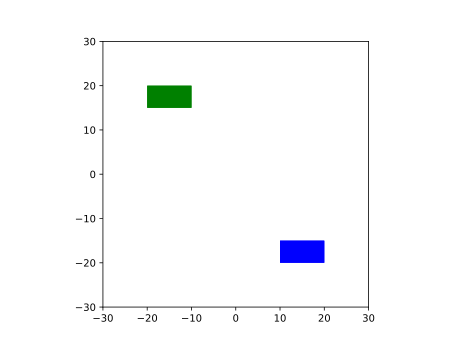

In [32]:
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from io import BytesIO

ET.register_namespace("", "http://www.w3.org/2000/svg")

fig, ax = plt.subplots()

# Create patches to which tooltips will be assigned.
rect1 = plt.Rectangle((10, -20), 10, 5, fc='blue')
rect2 = plt.Rectangle((-20, 15), 10, 5, fc='green')

shapes = [rect1, rect2]
labels = ['This is a blue rectangle.', 'This is a green rectangle']

for i, (item, label) in enumerate(zip(shapes, labels)):
    patch = ax.add_patch(item)
    annotate = ax.annotate(labels[i], xy=item.get_xy(), xytext=(0, 0),
                           textcoords='offset points', color='w', ha='center',
                           fontsize=8, bbox=dict(boxstyle='round, pad=.5',
                                                 fc=(.1, .1, .1, .92),
                                                 ec=(1., 1., 1.), lw=1,
                                                 zorder=1))

    ax.add_patch(patch)
    patch.set_gid('mypatch_{:03d}'.format(i))
    annotate.set_gid('mytooltip_{:03d}'.format(i))

# Save the figure in a fake file object
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
ax.set_aspect('equal')

f = BytesIO()
plt.savefig(f, format="svg");

# --- Add interactivity ---

# Create XML tree from the SVG file.
tree, xmlid = ET.XMLID(f.getvalue())
tree.set('onload', 'init(event)')

for i in shapes:
    # Get the index of the shape
    index = shapes.index(i)
    # Hide the tooltips
    tooltip = xmlid['mytooltip_{:03d}'.format(index)]
    tooltip.set('visibility', 'hidden')
    # Assign onmouseover and onmouseout callbacks to patches.
    mypatch = xmlid['mypatch_{:03d}'.format(index)]
    mypatch.set('onmouseover', "ShowTooltip(this)")
    mypatch.set('onmouseout', "HideTooltip(this)")

# This is the script defining the ShowTooltip and HideTooltip functions.
script = """
    <script type="text/ecmascript">
    <![CDATA[

    function init(event) {
        if ( window.svgDocument == null ) {
            svgDocument = event.target.ownerDocument;
            }
        }

    function ShowTooltip(obj) {
        var cur = obj.id.split("_")[1];
        var tip = svgDocument.getElementById('mytooltip_' + cur);
        tip.setAttribute('visibility', "visible")
        }

    function HideTooltip(obj) {
        var cur = obj.id.split("_")[1];
        var tip = svgDocument.getElementById('mytooltip_' + cur);
        tip.setAttribute('visibility', "hidden")
        }

    ]]>
    </script>
    """

# Insert the script at the top of the file and save it.
tree.insert(0, ET.XML(script))
ET.ElementTree(tree).write('svg_tooltip.svg');
SVG('svg_tooltip.svg')

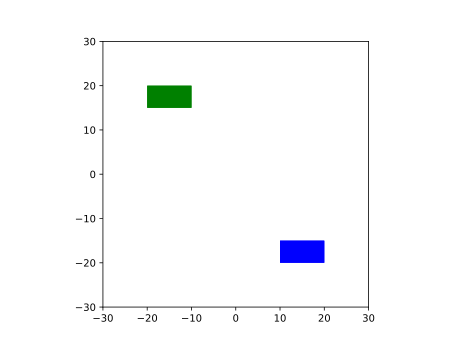

In [13]:
SVG('svg_tooltip.svg')